In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from IPython.display import SVG
import ipywidgets as widgets
from ipywidgets import interact
import json
from cgr.filepaths import filepaths
from cgr.draw import draw_molecule, draw_reaction
from itertools import chain

In [2]:
def show_highlighted_grid(smiles: str, rcs: list[list], legends: list[str], n_cols: int, sub_img_size: tuple = (200, 200)):
    mgrid = MolsToGridImage(
        mols=[Chem.MolFromSmiles(smi) for smi in smiles],
        highlightAtomLists=rcs,
        molsPerRow=n_cols,
        legends=legends,
        subImgSize=sub_img_size,
        maxMols=100
    )
    display(mgrid)

In [3]:
krs = filepaths.data / "raw" / "sprhea_240310_v3_mapped_no_subunits.json"
with open(krs, 'r') as f:
    krs = json.load(f)

In [4]:
decarb = {k: v for k,v  in krs.items() if v['min_rule'] == 'rule0024'}

View all known decarbs

In [5]:
kopts = list(decarb.keys())

@interact
def show_decarbs(key = widgets.Dropdown(value=kopts[0], options=kopts)):    
    rxn = decarb[key]
    print(rxn['imt_rules'])
    print(rxn['rhea_ids'])
    smiles = rxn['smarts'].split('>>')[0]
    rc = rxn['reaction_center'][0]
    display(SVG(draw_molecule(smiles, hilite_atoms=rc, size=(500, 300))))

interactive(children=(Dropdown(description='key', options=('14', '55', '121', '734', '1067', '1162', '1565', '…

View reactants grouped by intermediate rule

In [7]:
imt_rules = list(set(chain(*[rxn['imt_rules'] for rxn in decarb.values()])))

@interact
def show_imt_groups(imt = widgets.Dropdown(value=imt_rules[0], options=imt_rules)):
    rxns = {k: v for k, v in decarb.items() if v['imt_rules'][0] == imt}
    print(f"Number reactions: {len(rxns)}")
    stuff = [
        (k, rxn['smarts'].split('>>')[0], rxn['reaction_center'][0])
        for k, rxn in list(rxns.items())
    ]

    legends, smiles, rcs = zip(*stuff)
    n_cols = 3
    sub_img_size = (700, 300)
    show_highlighted_grid(smiles, rcs, legends, n_cols, sub_img_size)


interactive(children=(Dropdown(description='imt', options=('rule0024_46', 'rule0024_51', 'rule0024_29', 'rule0…

From case study

['A0A248QE08']


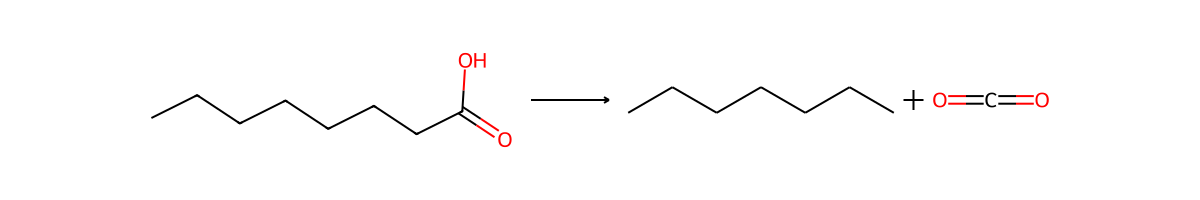

In [8]:
print([e['uniprot_id'] for e in krs['17305']['enzymes']])
SVG(draw_reaction(krs['17305']['smarts']))

['Q05115']


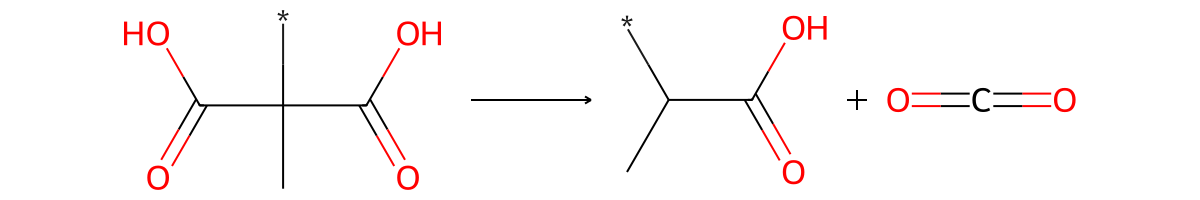

In [9]:
print([e['uniprot_id'] for e in krs['15876']['enzymes']])
SVG(draw_reaction(krs['15876']['smarts']))